In [23]:
import matplotlib.pyplot as plt

In [13]:
import os
import json
import re
import numpy as np

def parse_acceleration_data(folder_path, filenameContainsWord=None, datapointPerRecording=40000):
    """
    Parses acceleration data from JSON files in a folder.

    Args:
        folder_path (str): Path to the folder containing the JSON files.

    Returns:
        Tuple[numpy.ndarray, numpy.ndarray]: A tuple containing the acceleration data and the labels.

    Raises:
        ValueError: If the JSON files do not contain acceleration data with the expected format
                    or if the labels cannot be extracted from the filenames.
    """
    file_names = [f for f in os.listdir(folder_path) if f.endswith('.json') and filenameContainsWord in f]
    num_files = len(file_names)
    acceleration_data = np.empty((num_files, datapointPerRecording, 3))
    labels = np.empty((num_files, 1), dtype=np.object)

    for i, file_name in enumerate(file_names):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            json_data = json.load(file)

        if 'x' not in json_data or 'y' not in json_data or 'z' not in json_data:
            raise ValueError(f'Acceleration data not found in {file_path}')

        x_values = json_data['x']
        y_values = json_data['y'] # switch of x and y since the trained ki was trained with the sensorbox rotated by 90 degrees
        z_values = json_data['z']

        datapointsPerFile = int(json_data['sampleRateInHz'] * json_data['recordingDurationInSeconds'])

        if len(x_values) != datapointsPerFile or len(y_values) != datapointsPerFile or len(z_values) != datapointsPerFile:
            raise ValueError(f'Acceleration data size mismatch in {file_path}')

        acceleration_data[i] = np.array([x_values, y_values, z_values]).T

        # Extract label from the filename using regular expressions
        match = re.search(r'_scenario_(.*?)\.json', file_name)
        if match is None:
            raise ValueError(f'Label extraction error in {file_path}')

        label = match.group(1)
        #print(label)
        labels[i] = label

    return acceleration_data, labels

In [20]:
folder_path = "./data/20230821"

try:
    acceleration_array5kg, labels5kg = parse_acceleration_data(folder_path, "5kg",12000 )
    acceleration_array0kg, labels0kg = parse_acceleration_data(folder_path, "0kg",12000 )
    # print(acceleration_array.shape)  # Output the shape of the acceleration array
    # print(labels.shape)  # Output the shape of the labels array
except ValueError as e:
    print(f'Error: {e}')

/tmp/ipykernel_9756/957246149.py:23: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = np.empty((num_files, 1), dtype=np.object)


In [74]:
np.max(acceleration_array0kg[2])

10.223596572875977

In [71]:
np.max(acceleration_array5kg)

10.223596572875977

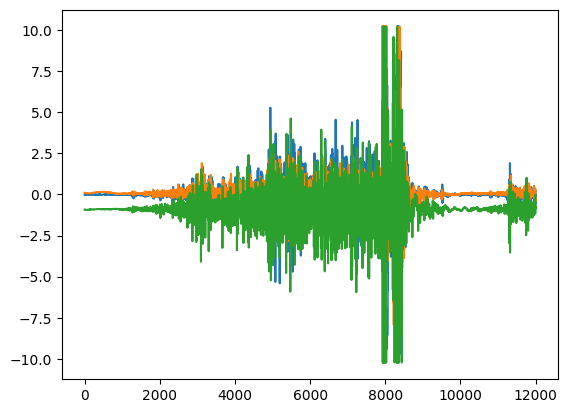

In [32]:
plt.plot(acceleration_array5kg[0])

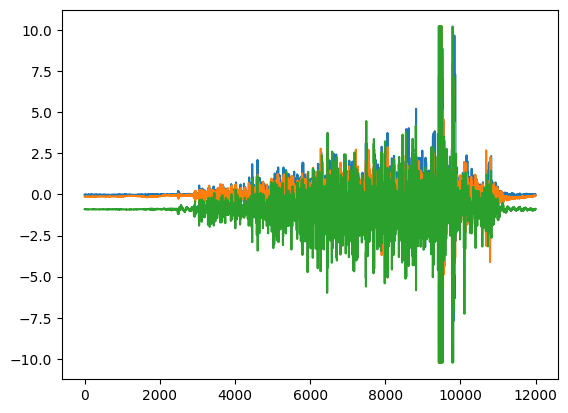

In [36]:
plt.plot(acceleration_array0kg[3])

In [75]:
import matplotlib.pyplot as plt
import numpy as np

def plot_acceleration_data(arr1, arr2, dpi=600):
    # Verify input shapes
    if arr1.shape != (15, 12000, 3) or arr2.shape != (15, 12000, 3):
        raise ValueError("Input arrays must have shape (15, 40000, 3)")

    # Create a time array based on the sample rate
    sample_rate = 4000
    time = np.arange(0, 3, 1/sample_rate)

    # Create a figure with two columns
    fig, axs = plt.subplots(15, 2, figsize=(16, 20), dpi=dpi)
    plt.subplots_adjust(hspace=0.5)

     # Set the title of the first column to "0kg" and the second column to "5kg"
    axs[0, 0].set_title("0kg")
    axs[0, 1].set_title("5kg")
    
    # Plot acceleration curves from the first array in the first column
    for i in range(15):
        axs[i, 0].plot(time, arr1[i, :, :])
        #axs[i, 0].set_title(f"Array 1 - Curve {i + 1}")
        axs[i, 0].set_xlabel("Time (s)")
        axs[i, 0].set_ylabel("Acceleration")
        #axs[i, 0].set_ylim(-20, 20)  # Set y-axis limits

    # Plot acceleration curves from the second array in the second column
    for i in range(15):
        axs[i, 1].plot(time, arr2[i, :, :])
        #axs[i, 1].set_title(f"Array 2 - Curve {i + 1}")
        axs[i, 1].set_xlabel("Time (s)")
        axs[i, 1].set_ylabel("Acceleration")
        #axs[i, 1].set_ylim(-20, 20)  # Set y-axis limits

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Create two sample arrays (replace these with your actual data)
array1 = np.random.randn(15, 12000, 3)
array2 = np.random.randn(15, 12000, 3)



In [76]:
plot_acceleration_data(acceleration_array0kg, acceleration_array5kg, dpi=600)